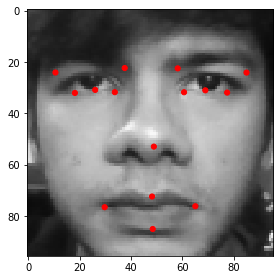

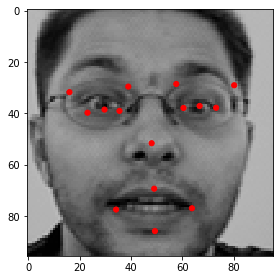

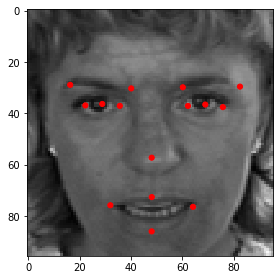

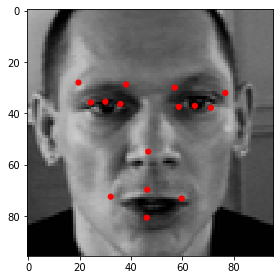

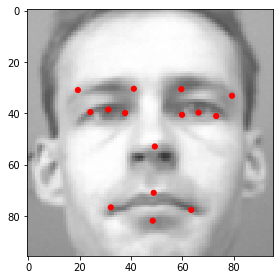

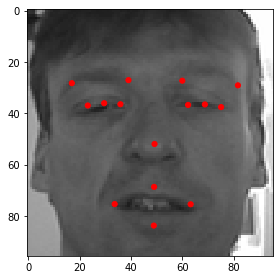

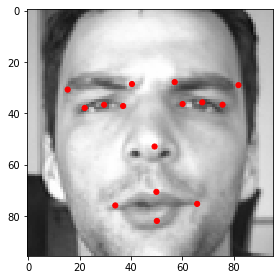

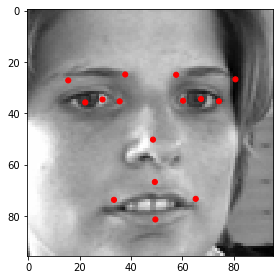

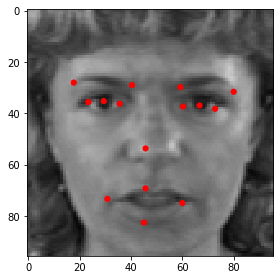

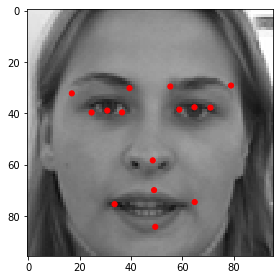

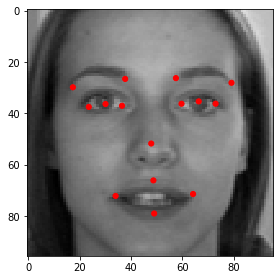

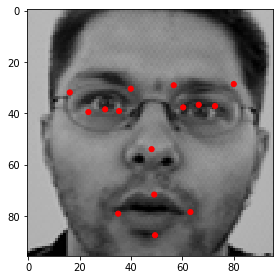

In [1]:
# Implement the model in real-time 

# Importing the libraries
import numpy as np
from training import get_model, load_trained_model, compile_model
import cv2

In [2]:
# Load the trained model
model = get_model()
compile_model(model)
load_trained_model(model)

# Get frontal face haar cascade
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_default.xml')

In [11]:
# Get webcam
camera = cv2.VideoCapture(0)

# Run the program infinitely
while True:
    grab_trueorfalse, img = camera.read()       # Read data from the webcam
    
    # Preprocess input fram webcam
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        # Convert RGB data to Grayscale
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)     # Identify faces in the webcam
    
    # For each detected face using tha Haar cascade
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        img_copy = np.copy(img)
        img_copy_1 = np.copy(img)
        roi_color = img_copy_1[y:y+h, x:x+w]
        
        width_original = roi_gray.shape[1]      # Width of region where face is detected
        height_original = roi_gray.shape[0]     # Height of region where face is detected
        img_gray = cv2.resize(roi_gray, (96, 96))       # Resize image to size 96x96
        img_gray = img_gray/255         # Normalize the image data
        
        img_model = np.reshape(img_gray, (1,96,96,1))   # Model takes input of shape = [batch_size, height, width, no. of channels]
        keypoints = model.predict(img_model)[0]         # Predict keypoints for the current input
        
        # Keypoints are saved as (x1, y1, x2, y2, ......)
        x_coords = keypoints[0::2]      # Read alternate elements starting from index 0
        y_coords = keypoints[1::2]      # Read alternate elements starting from index 1
        
        x_coords_denormalized = (x_coords+0.5)*width_original       # Denormalize x-coordinate
        y_coords_denormalized = (y_coords+0.5)*height_original      # Denormalize y-coordinate
        
        for i in range(len(x_coords)):          # Plot the keypoints at the x and y coordinates
            cv2.circle(roi_color, (x_coords_denormalized[i], y_coords_denormalized[i]), 2, (255,255,0), -1)
        
        # Particular keypoints for scaling and positioning of the filter
        left_lip_coords = (int(x_coords_denormalized[11]), int(y_coords_denormalized[11]))
        right_lip_coords = (int(x_coords_denormalized[12]), int(y_coords_denormalized[12]))
        top_lip_coords = (int(x_coords_denormalized[13]), int(y_coords_denormalized[13]))
        bottom_lip_coords = (int(x_coords_denormalized[14]), int(y_coords_denormalized[14]))
        left_eye_coords = (int(x_coords_denormalized[3]), int(y_coords_denormalized[3]))
        right_eye_coords = (int(x_coords_denormalized[5]), int(y_coords_denormalized[5]))
        brow_coords = (int(x_coords_denormalized[6]), int(y_coords_denormalized[6]))
        
        # Scale filter according to keypoint coordinates
        beard_width = right_lip_coords[0] - left_lip_coords[0]
        glasses_width = right_eye_coords[0] - left_eye_coords[0]
        
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2BGRA)       # Used for transparency overlay of filter using the alpha channel

        # Beard filter
        santa_filter = cv2.imread('filters/santa_filter.png', -1)
        santa_filter = cv2.resize(santa_filter, (beard_width*3,150))
        sw,sh,sc = santa_filter.shape
        
        for i in range(0,sw):       # Overlay the filter based on the alpha channel
            for j in range(0,sh):
                if santa_filter[i,j][3] != 0:
                    try:
                        img_copy[top_lip_coords[1]+i+y-20, left_lip_coords[0]+j+x-60] = santa_filter[i,j]
                    except:
                        continue
                    
        # Hat filter
        hat = cv2.imread('filters/hat2.png', -1)
        hat = cv2.resize(hat, (w,w))
        hw,hh,hc = hat.shape
        
        for i in range(0,hw):       # Overlay the filter based on the alpha channel
            for j in range(0,hh):
                if hat[i,j][3] != 0:
                    img_copy[i+y-brow_coords[1]*2, j+x-left_eye_coords[0]*1 + 20] = hat[i,j]
        
        # Glasses filter
        glasses = cv2.imread('filters/glasses.png', -1)
        glasses = cv2.resize(glasses, (glasses_width*2,150))
        gw,gh,gc = glasses.shape
        
        for i in range(0,gw):       # Overlay the filter based on the alpha channel
            for j in range(0,gh):
                if glasses[i,j][3] != 0:
                    img_copy[brow_coords[1]+i+y-50, left_eye_coords[0]+j+x-60] = glasses[i,j]
        
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGRA2BGR)       # Revert back to BGR
        
        cv2.imshow('Output',img_copy)           # Output with the filter placed on the face
        cv2.imshow('Keypoints predicted',img_copy_1)        # Place keypoints on the webcam input
        
    cv2.imshow('Webcam',img)        # Original webcame Input
    
    if cv2.waitKey(1) & 0xFF == ord("e"):   # If 'e' is pressed, stop reading and break the loop
        break
        
camera.release()
cv2.destroyAllWindows()

<ipython-input-11-23dfdcc69902>:35: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(roi_color, (x_coords_denormalized[i], y_coords_denormalized[i]), 2, (255,255,0), -1)


In [50]:
camera.release()
cv2.destroyAllWindows()

In [10]:
# Get webcam
camera = cv2.VideoCapture(0)

# Run the program infinitely
while True:
    grab_trueorfalse=True
    img = cv2.imread('kdp.jpg')    # Read data from the webcam
    
    # Preprocess input fram webcam
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        # Convert RGB data to Grayscale
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)     # Identify faces in the webcam
    
    # For each detected face using the Haar cascade
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        img_copy = np.copy(img)
        img_copy_1 = np.copy(img)
        roi_color = img_copy_1[y:y+h, x:x+w]
        
        width_original = roi_gray.shape[1]      # Width of region where face is detected
        height_original = roi_gray.shape[0]     # Height of region where face is detected
        img_gray = cv2.resize(roi_gray, (96, 96))       # Resize image to size 96x96
        img_gray = img_gray/255         # Normalize the image data
        
        img_model = np.reshape(img_gray, (1,96,96,1))   # Model takes input of shape = [batch_size, height, width, no. of channels]
        keypoints = model.predict(img_model)[0]         # Predict keypoints for the current input
        
        # Keypoints are saved as (x1, y1, x2, y2, ......)
        x_coords = keypoints[0::2]      # Read alternate elements starting from index 0
        y_coords = keypoints[1::2]      # Read alternate elements starting from index 1
        
        x_coords_denormalized = (x_coords+0.5)*width_original       # Denormalize x-coordinate
        y_coords_denormalized = (y_coords+0.5)*height_original      # Denormalize y-coordinate
        
        for i in range(len(x_coords)):          # Plot the keypoints at the x and y coordinates
            cv2.circle(roi_color, (x_coords_denormalized[i], y_coords_denormalized[i]), 2, (255,255,0), -1)
        
        # Particular keypoints for scaling and positioning of the filter
        left_lip_coords = (int(x_coords_denormalized[11]), int(y_coords_denormalized[11]))
        right_lip_coords = (int(x_coords_denormalized[12]), int(y_coords_denormalized[12]))
        top_lip_coords = (int(x_coords_denormalized[13]), int(y_coords_denormalized[13]))
        bottom_lip_coords = (int(x_coords_denormalized[14]), int(y_coords_denormalized[14]))
        left_eye_coords = (int(x_coords_denormalized[3]), int(y_coords_denormalized[3]))
        right_eye_coords = (int(x_coords_denormalized[5]), int(y_coords_denormalized[5]))
        brow_coords = (int(x_coords_denormalized[6]), int(y_coords_denormalized[6]))
        
        # Scale filter according to keypoint coordinates
        beard_width = right_lip_coords[0] - left_lip_coords[0]
        glasses_width = right_eye_coords[0] - left_eye_coords[0]
        
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2BGRA)       # Used for transparency overlay of filter using the alpha channel

        # Beard filter
        santa_filter = cv2.imread('filters/santa_filter.png', -1)
        santa_filter = cv2.resize(santa_filter, (beard_width*3,150))
#         santa_filter = cv2.cvtColor(santa_filter,cv2.COLOR_RGB2GRAY)
        sw,sh,sc = santa_filter.shape
        
        for i in range(0,sw):       # Overlay the filter based on the alpha channel
            for j in range(0,sh):
                if santa_filter[i,j][3] != 0:
                    try:
                        img_copy[top_lip_coords[1]+i+y-20, left_lip_coords[0]+j+x-60] = santa_filter[i,j]
                    except:
                        continue
                    
        # Hat filter
        hat = cv2.imread('filters/dope_hat.png', -1)
        hat = cv2.resize(hat, (w,w))
        hw,hh,hc = hat.shape
        
        for i in range(0,hw):       # Overlay the filter based on the alpha channel
            for j in range(0,hh):
                if hat[i,j][3] != 0:
                    img_copy[i+y-brow_coords[1]-60, j+x-left_eye_coords[0]*1 + 50] = hat[i,j]
        
        # Glasses filter
        glasses = cv2.imread('filters/glasses.png', -1)
        glasses = cv2.resize(glasses, (glasses_width*2,150))
#         glasses = cv2.bitwise_not(glasses)
        gw,gh,gc = glasses.shape
        
        for i in range(0,gw):       # Overlay the filter based on the alpha channel
            for j in range(0,gh):
                if glasses[i,j][3] != 0:
                    img_copy[brow_coords[1]+i+y-50, left_eye_coords[0]+j+x-50] = glasses[i,j]
        
        img_copy = cv2.cvtColor(img_copy, cv2.  COLOR_BGRA2BGR)       # Revert back to BGR
        
        cv2.imshow('Output',img_copy)           # Output with the filter placed on the face
        cv2.imshow('Keypoints predicted',img_copy_1)        # Place keypoints on the webcam input
        
    cv2.imshow('Webcam',img)        # Original webcame Input
    
    if cv2.waitKey(1) & 0xFF == ord("e"):   # If 'e' is pressed, stop reading and break the loop
        break
        
camera.release()
cv2.destroyAllWindows()

<ipython-input-10-58f658d9ddad>:36: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(roi_color, (x_coords_denormalized[i], y_coords_denormalized[i]), 2, (255,255,0), -1)
